# 1η εργασία Αναγνώριση Προτύπων 
## Σταύρος Βασίλειος Μπουλιόπουλος 9671
Εισαγωγή βιβλιοθηκών

In [80]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mpl_toolkits import mplot3d

Χαρακτηριστικά $\textbf{x}$ : 2 μικροβιολογικοί δείκτες, όπου είναι ανεξάρτητοι μεταξύ τους για να έχουμε διαγώνιο πίνακα συμμεταβλητότηας. Κλάση $ω_1$ : υγιής. Κλάση $ω_2$ : πιθανή ύπαρξη καρκίνου.

# Μέρος A
Αρχικοποίηση δεδομένων χρησιμοποίωντας τους πίνακες μέσων τιμών και συμμεταβλητότητας της εκφώνησης.

In [81]:
# Klaseis w1,w2. w1: ygihs, w2: karkinos
# eksetash me 2 deiktes opou ka8e deikths mia katanomh
# meses times
mean_c1 = np.array([0.4, 0.8])
mean_c2 = np.array([1.5, 2.7])

# symmetablhtothta
cov_c1 = np.array([[1.5, 0],[0, 0.8]])
cov_c2 = np.array([[1.5, 0],[0, 0.8]])
# katanomes Normal Gaussian
Px_w1 = multivariate_normal(mean_c1 , cov_c1)
Px_w2 = multivariate_normal(mean_c2 , cov_c2)

# a priori pi8anothtes
P_w1 = 0.95
P_w2 = 0.05

$\textbf{A.1}$ Παρουσίαση αποτελεσμάτων των κατανομών $p(\textbf{x}|\omega_1)$ και $p(\textbf{x}|\omega_2)$ σε 2D ξεχωριστά ανά κλάση, αλλά και σε 3D μαζί.

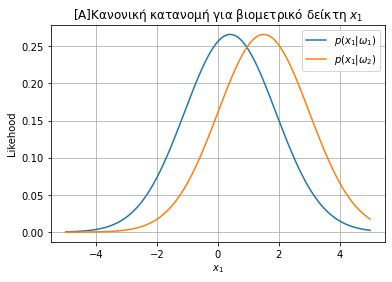

In [82]:
x = np.linspace(-5,5,1000)

plt.plot(x, norm.pdf(x, mean_c1[0] , cov_c1[0,0]),label = '$p(x_1|\omega_1)$')
plt.plot(x, norm.pdf(x, mean_c2[0] , cov_c2[0,0]), label = '$p(x_1|\omega_2)$')
plt.grid()
plt.title('[Α]Κανονική κατανομή για βιομετρικό δείκτη $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('Likehood')
plt.legend()
plt.show()

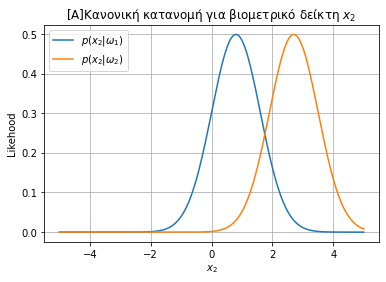

In [83]:
x = np.linspace(-5,5,1000)

plt.plot(x, norm.pdf(x, mean_c1[1] , cov_c1[1,1]),label = '$p(x_2|\omega_1)$')
plt.plot(x, norm.pdf(x, mean_c2[1] , cov_c2[1,1]), label = '$p(x_2|\omega_2)$')
plt.grid()
plt.title('[Α]Κανονική κατανομή για βιομετρικό δείκτη $x_2$')
plt.xlabel('$x_2$')
plt.ylabel('Likehood')
plt.legend()
plt.show()

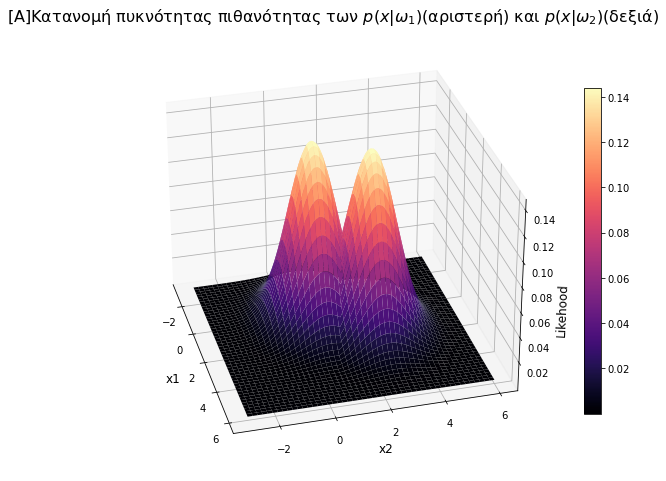

In [84]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, np.where(Px_w1.pdf(pos) > Px_w2.pdf(pos), Px_w1.pdf(pos), Px_w2.pdf(pos)),cmap='magma',linewidth=0.5)

ax.set_title(label ='[Α]Κατανομή πυκνότητας πιθανότητας των $p(x|\omega_1)$(αριστερή) και $p(x|\omega_2)$(δεξιά)',fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('Likehood', fontsize=12)
ax.view_init(30, -15)
fig.colorbar(surf, ax = ax,shrink = 0.6)
plt.show()

$\textbf{A.2}$ Υπολογισμός και παρουσίαση ολικής κατανομής πυκνότητας πιθανότητας $P(\textbf{x})$  βάσει Bayes.

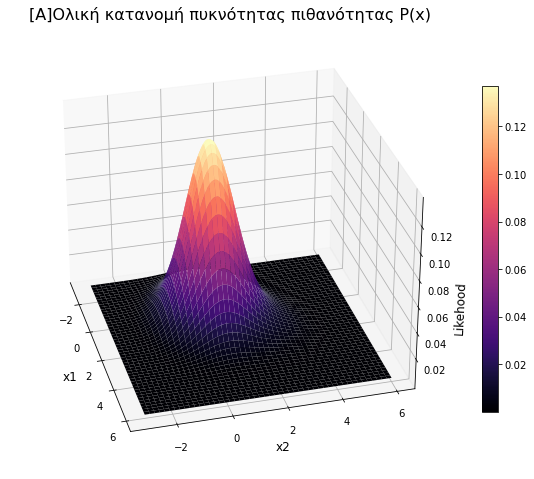

In [85]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Px_olikh,cmap='magma',linewidth=0.5)

ax.set_title(label ='[Α]Ολική κατανομή πυκνότητας πιθανότητας P(x)',fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('Likehood', fontsize=12)
ax.view_init(30, -15)
fig.colorbar(surf, ax = ax,shrink = 0.6)
plt.show()

$\textbf{A.3}$ Υπολογισμός και παρουσίαση a posteriori πιθανοτήτων $p(\omega_1|\textbf{x})$ και $p(\omega_2|\textbf{x})$.

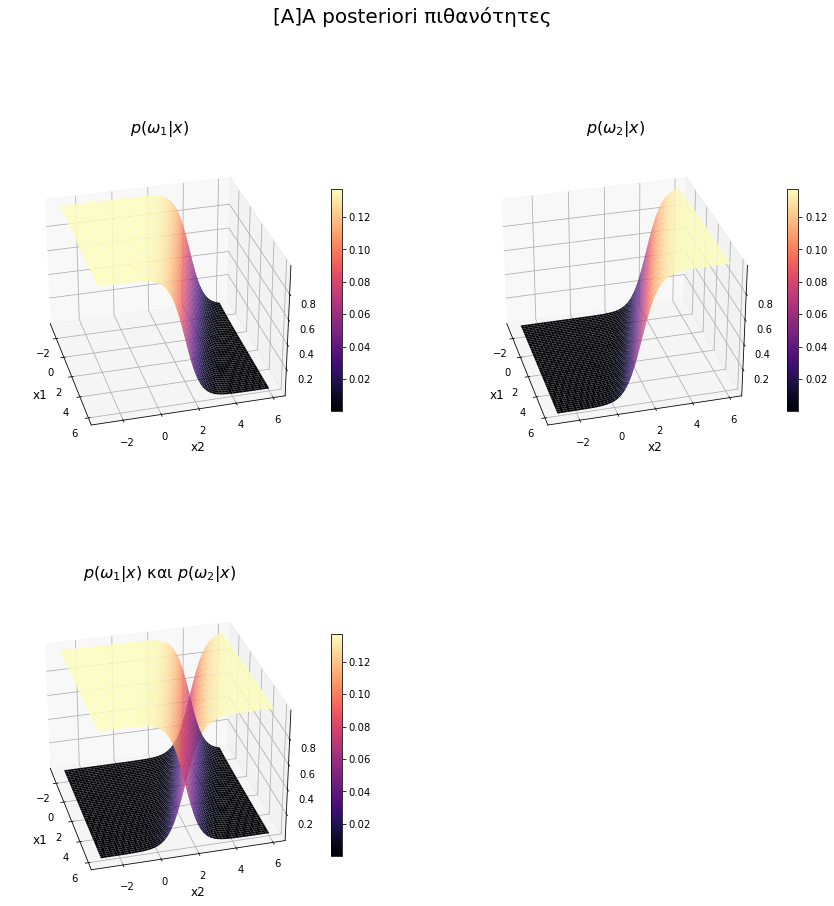

In [86]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# ypologismo twn a posteriori apo sxesh Bayes gia thn ka8e klash
Pomega1_x = (Px_w1.pdf(pos) * P_w1) / Px_olikh
Pomega2_x = (Px_w2.pdf(pos) * P_w2) / Px_olikh

# 3D plots
fig = plt.figure(figsize = (15,15))
fig.suptitle("[Α]A posteriori πιθανότητες" ,fontsize=20)

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax1.set_title(label ='$p(\omega_1|x)$',fontsize=16,pad=15.0)
ax1.plot_surface(X, Y, Pomega1_x,cmap='magma',linewidth=0.5)
ax1.set_xlabel('x1', fontsize=12)
ax1.set_ylabel('x2', fontsize=12)
ax1.view_init(30, -15)
fig.colorbar(surf, ax = ax1,shrink = 0.6)

ax2.set_title(label ='$p(\omega_2|x)$',fontsize=16,pad=15.0)
ax2.plot_surface(X, Y, Pomega2_x,cmap='magma',linewidth=0.5)
ax2.set_xlabel('x1', fontsize=12)
ax2.set_ylabel('x2', fontsize=12)
ax2.view_init(30, -15)
fig.colorbar(surf, ax = ax2,shrink = 0.6)

ax3.set_title(label ='$p(\omega_1|x)$ και $p(\omega_2|x)$',fontsize=16,pad=15.0)
ax3.plot_surface(X, Y, Pomega1_x,cmap='magma',linewidth=0.5)
ax3.plot_surface(X, Y, Pomega2_x,cmap='magma',linewidth=0.5)
ax3.set_xlabel('x1', fontsize=12)
ax3.set_ylabel('x2', fontsize=12)
ax3.view_init(30, -15)
fig.colorbar(surf, ax = ax3,shrink = 0.6)
plt.show()

$\textbf{A.4}$ Υπολογισμός σφάλματος(error) κατά Bayes.

In [87]:
# ypologismos tou error oloklhrwnontas ston xwro twn deigmatwn
error = 0
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
stepSpace = 20 * 20 / (1000 * 1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# ypologismo twn a posteriori apo sxesh Bayes gia thn ka8e klash
Pomega1_x = (Px_w1.pdf(pos) * P_w1) / Px_olikh
Pomega2_x = (Px_w2.pdf(pos) * P_w2) / Px_olikh

for i in range(x.shape[0]):
  for j in range(y.shape[0]):
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      error = error + Px_w1.pdf(pos[i,j,:]) * P_w1 * stepSpace
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      error = error + Px_w2.pdf(pos[i,j,:]) * P_w2 * stepSpace
          
print("[Α]Άρα το σφάλμα κατά Bayes είναι: ",error)

[Α]Άρα το σφάλμα κατά Bayes είναι:  0.03456325895186966


$\textbf{Σχόλιο για A.4}$ Το σφάλμα είναι πολύ μικρό όπως περιμέναμε καθώς o Bayes τείνει να προβλέπει πιθανότητες που είναι σχεδόν πάντα είτε πολύ κοντά στο μηδέν είτε πολύ κοντά στο ένα.

# Μέρος Β
Αρχικοποίηση δεδομένων χρησιμοποίωντας τους πίνακες μέσων τιμών και συμμεταβλητότητας της εκφώνησης όπως στο μέρος Α με την μόνη διαφορά $Σ_2 = Σ_1/4$.

In [88]:
# Klaseis w1,w2. w1: ygihs, w2: karkinos
# eksetash me 2 deiktes opou ka8e deikths mia katanomh
# meses times
mean_c1 = np.array([0.4, 0.8])
mean_c2 = np.array([1.5, 2.7])

# symmetablhtothta
cov_c1 = np.array([[1.5, 0],[0, 0.8]])
cov_c2 = np.array([[1.5, 0],[0, 0.8]])/4
# katanomes Normal Gaussian
Px_w1 = multivariate_normal(mean_c1 , cov_c1)
Px_w2 = multivariate_normal(mean_c2 , cov_c2)

# a priori pi8anothtes
P_w1 = 0.95
P_w2 = 0.05

$\textbf{Β.1}$ Επανάληψη διαδικασιών όπως στο μέρος Α.

Παρουσίαση αποτελεσμάτων των κατανομών $p(\textbf{x}|\omega_1)$ και $p(\textbf{x}|\omega_2)$ σε 2D ξεχωριστά ανά κλάση, αλλά και σε 3D μαζί.

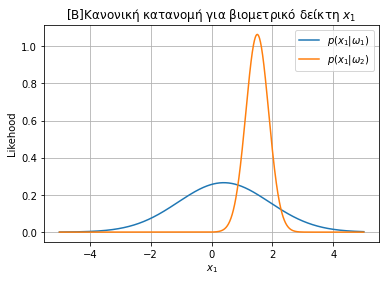

In [89]:
x = np.linspace(-5,5,1000)

plt.plot(x, norm.pdf(x, mean_c1[0] , cov_c1[0,0]),label = '$p(x_1|\omega_1)$')
plt.plot(x, norm.pdf(x, mean_c2[0] , cov_c2[0,0]), label = '$p(x_1|\omega_2)$')
plt.grid()
plt.title('[B]Κανονική κατανομή για βιομετρικό δείκτη $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('Likehood')
plt.legend()
plt.show()

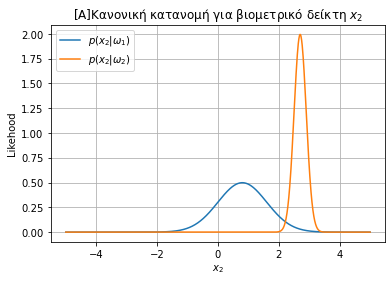

In [90]:
x = np.linspace(-5,5,1000)

plt.plot(x, norm.pdf(x, mean_c1[1] , cov_c1[1,1]),label = '$p(x_2|\omega_1)$')
plt.plot(x, norm.pdf(x, mean_c2[1] , cov_c2[1,1]), label = '$p(x_2|\omega_2)$')
plt.grid()
plt.title('[Α]Κανονική κατανομή για βιομετρικό δείκτη $x_2$')
plt.xlabel('$x_2$')
plt.ylabel('Likehood')
plt.legend()
plt.show()

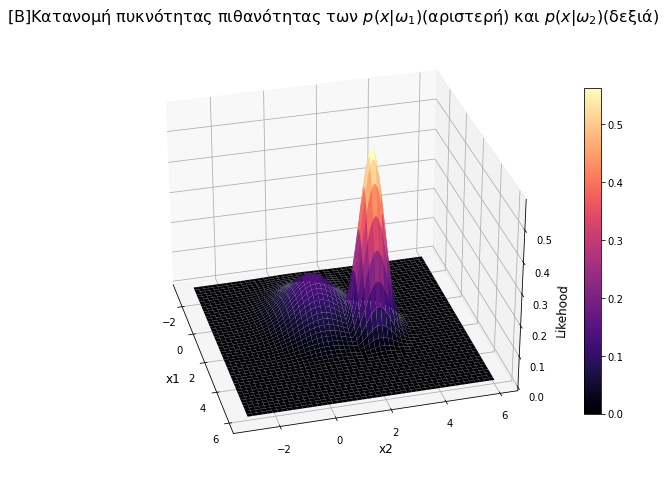

In [91]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, np.where(Px_w1.pdf(pos) > Px_w2.pdf(pos), Px_w1.pdf(pos), Px_w2.pdf(pos)),cmap='magma',linewidth=0.5)

ax.set_title(label ='[B]Κατανομή πυκνότητας πιθανότητας των $p(x|\omega_1)$(αριστερή) και $p(x|\omega_2)$(δεξιά)',fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('Likehood', fontsize=12)
ax.view_init(30, -15)
fig.colorbar(surf, ax = ax,shrink = 0.6)
plt.show()

Υπολογισμός και παρουσίαση ολικής κατανομής πυκνότητας πιθανότητας $P(\textbf{x})$  βάσει Bayes.

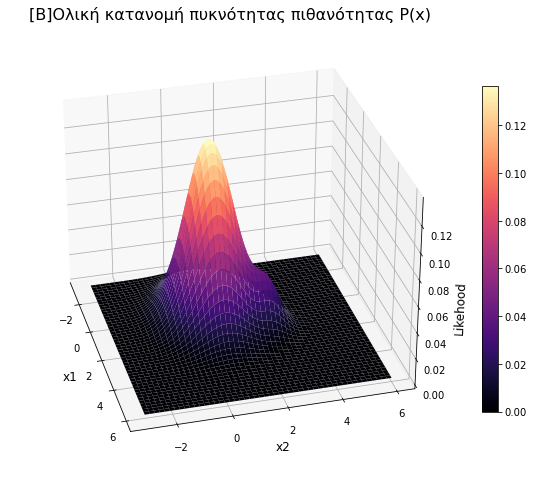

In [92]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# 3D plot
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Px_olikh,cmap='magma',linewidth=0.5)

ax.set_title(label ='[B]Ολική κατανομή πυκνότητας πιθανότητας P(x)',fontsize=16)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('Likehood', fontsize=12)
ax.view_init(30, -15)
fig.colorbar(surf, ax = ax,shrink = 0.6)
plt.show()

Υπολογισμός και παρουσίαση a posteriori πιθανοτήτων $p(\omega_1|\textbf{x})$ και $p(\omega_2|\textbf{x})$.

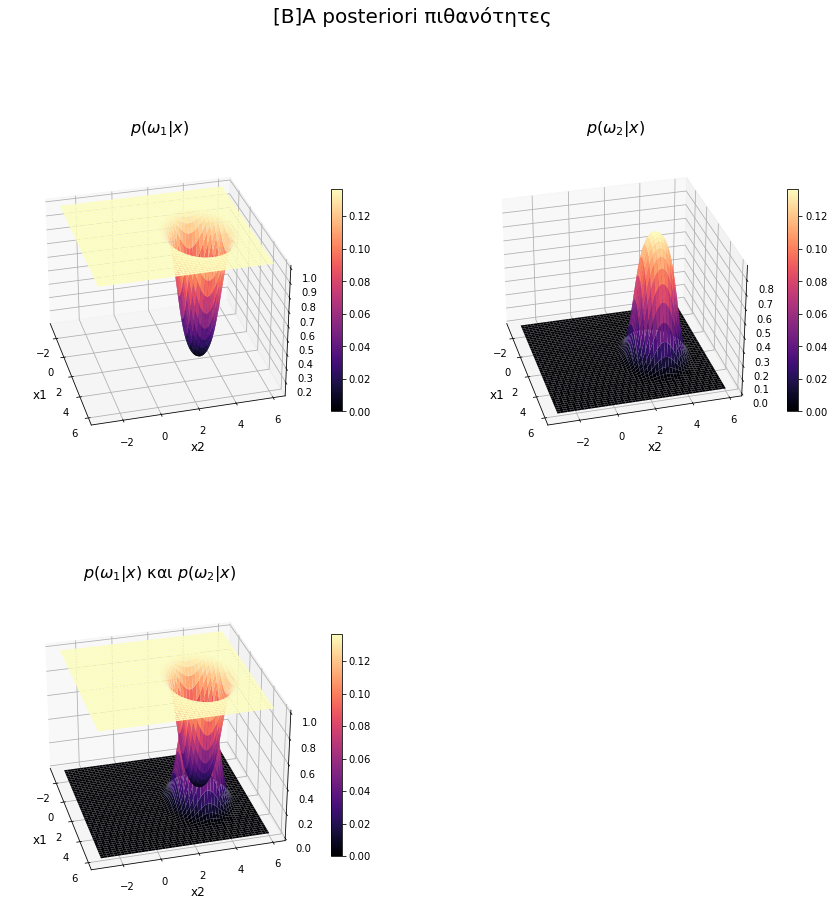

In [93]:
x = np.linspace(-3,6,1000)
y = np.linspace(-3,6,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# ypologismo twn a posteriori apo sxesh Bayes gia thn ka8e klash
Pomega1_x = (Px_w1.pdf(pos) * P_w1) / Px_olikh
Pomega2_x = (Px_w2.pdf(pos) * P_w2) / Px_olikh

# 3D plots
fig = plt.figure(figsize = (15,15))
fig.suptitle("[B]A posteriori πιθανότητες" ,fontsize=20)

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

ax1.set_title(label ='$p(\omega_1|x)$',fontsize=16,pad=15.0)
ax1.plot_surface(X, Y, Pomega1_x,cmap='magma',linewidth=0.5)
ax1.set_xlabel('x1', fontsize=12)
ax1.set_ylabel('x2', fontsize=12)
ax1.view_init(30, -15)
fig.colorbar(surf, ax = ax1,shrink = 0.6)

ax2.set_title(label ='$p(\omega_2|x)$',fontsize=16,pad=15.0)
ax2.plot_surface(X, Y, Pomega2_x,cmap='magma',linewidth=0.5)
ax2.set_xlabel('x1', fontsize=12)
ax2.set_ylabel('x2', fontsize=12)
ax2.view_init(30, -15)
fig.colorbar(surf, ax = ax2,shrink = 0.6)

ax3.set_title(label ='$p(\omega_1|x)$ και $p(\omega_2|x)$',fontsize=16,pad=15.0)
ax3.plot_surface(X, Y, Pomega1_x,cmap='magma',linewidth=0.5)
ax3.plot_surface(X, Y, Pomega2_x,cmap='magma',linewidth=0.5)
ax3.set_xlabel('x1', fontsize=12)
ax3.set_ylabel('x2', fontsize=12)
ax3.view_init(30, -15)
fig.colorbar(surf, ax = ax3,shrink = 0.6)
plt.show()

$\textbf{B.2}$ Υπολογισμός σφάλματος(error) κατά Bayes και σύγκριση αυτού με το σφάλμα του μέρους Α.

In [97]:
# ypologismos tou error oloklhrwnontas ston xwro twn deigmatwn
error = 0
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
stepSpace = 20 * 20 / (1000 * 1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# pairnw thn sxesh tou Bayes me tis dwsmenes a priori pi8anothtes
Px_olikh = Px_w1.pdf(pos) * P_w1 + Px_w2.pdf(pos) * P_w2

# ypologismo twn a posteriori apo sxesh Bayes gia thn ka8e klash
Pomega1_x = (Px_w1.pdf(pos) * P_w1) / Px_olikh
Pomega2_x = (Px_w2.pdf(pos) * P_w2) / Px_olikh

for i in range(x.shape[0]):
  for j in range(y.shape[0]):
    if Pomega2_x[i][j] >= Pomega1_x[i][j]:
      error = error + Px_w1.pdf(pos[i,j,:]) * P_w1 * stepSpace
    if Pomega1_x[i][j] > Pomega2_x[i][j]:
      error = error + Px_w2.pdf(pos[i,j,:]) * P_w2 * stepSpace
          
print("[B]Άρα το σφάλμα κατά Bayes είναι: ",error)

[B]Άρα το σφάλμα κατά Bayes είναι:  0.028971741016928437


$\textbf{Σχόλιο για Β.2}$ Το σφάλμα εξακολουθεί να είναι μικρό, όπως περιμέναμε για έναν ταξινομητή κατά Bayes. Αυτό είναι μικρότερο από εκείνο του μέρους Α, διότι αν παρατηρήσουμε και συγκρίνουμε τα διαγράμματα κατανομών $p(\textbf{x}|\omega_1)$ και $p(\textbf{x}|\omega_2)$ σε 2D των A-B μερών, τότε γίνεται ευδιάκριτο ότι υπάρχει μικρότερη επικάλυψη επιφανειών μεταξύ των καμπυλών. Άρα, σε αυτή την περίπτωση στο μέρος B έχουμε πιο εύκολo διαχωριστικό πεδίο επιλογής μεταξύ των κλάσεων βάσει των βιομετρικών δεικτών.